## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
dataset = pd.read_csv('raw_data\weather_dataset.csv', index_col='date', parse_dates=True)

In [3]:
dataset.head()

,Ttb,Tx,Tn,R,Utb,Un
date,,,,,,
2014-01-01,12.8,23.0,6.5,NaN,75.0,39.0
2014-01-02,14.0,23.0,7.6,NaN,75.0,43.0
2014-01-03,16.7,25.3,10.6,NaN,75.0,43.0
2014-01-04,16.2,24.4,75.8,NaN,76.0,36.0
2014-01-05,15.6,22.6,10.0,NaN,74.0,49.0


## Preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2014-01-01 to 2021-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ttb     2922 non-null   float64
 1   Tx      2922 non-null   float64
 2   Tn      2922 non-null   float64
 3   R       1307 non-null   float64
 4   Utb     2922 non-null   float64
 5   Un      2922 non-null   float64
dtypes: float64(6)
memory usage: 159.8 KB


In [5]:
dataset.describe()

,Ttb,Tx,Tn,R,Utb,Un
count,2922.000000,2922.000000,2922.000000,1307.000000,2922.000000,2922.000000
mean,23.284155,27.967796,20.433949,9.339250,83.347194,66.742300
std,5.157147,5.748642,5.583964,14.876705,7.131506,13.703928
min,6.100000,8.000000,1.700000,0.000000,48.000000,23.000000
25%,19.400000,23.700000,16.900000,0.400000,79.000000,58.000000
50%,24.500000,29.000000,21.600000,2.700000,84.000000,66.000000
75%,27.600000,32.900000,24.600000,12.000000,88.000000,76.000000
max,31.600000,39.000000,83.500000,90.000000,99.000000,98.000000


`Theo như người cung cấp dữ liệu thì Lượng mưa null thì tức là ngày hôm đó không mưa, lượng mưa = 0.0 thì hôm đó có mưa nhưng
 lượng mưa rất thấp.
 Do đó ta sẽ điền vào các ô null ở cột mưa thành giá trị -1 để tránh trùng với 0.0`

In [6]:
dataset['R'] = dataset['R'].fillna(-1)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2014-01-01 to 2021-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ttb     2922 non-null   float64
 1   Tx      2922 non-null   float64
 2   Tn      2922 non-null   float64
 3   R       2922 non-null   float64
 4   Utb     2922 non-null   float64
 5   Un      2922 non-null   float64
dtypes: float64(6)
memory usage: 159.8 KB


### Data visualization
`Để có cái nhìn trực quan về dữ liệu thì tôi sẽ vẽ biểu đồ từng cột dữ liệu bằng thư viện Matplotlib và Seaborn`

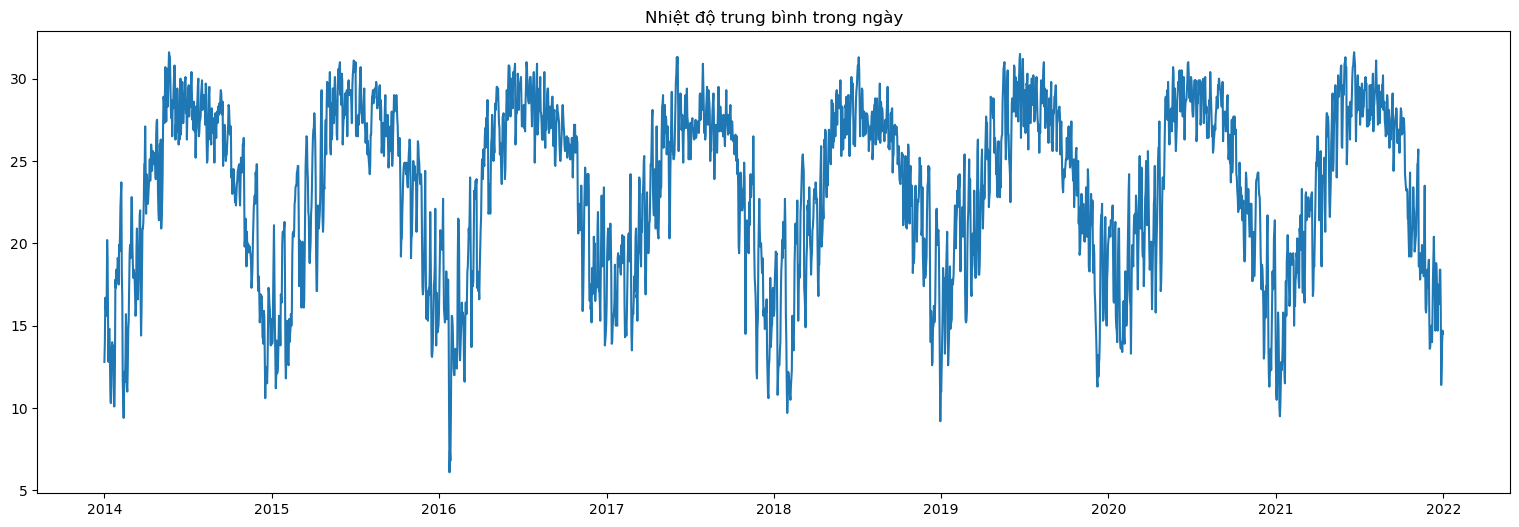

In [8]:
plt.figure(figsize=(19,6))
plt.plot(dataset.index, dataset['Ttb'])
plt.title('Nhiệt độ trung bình trong ngày');

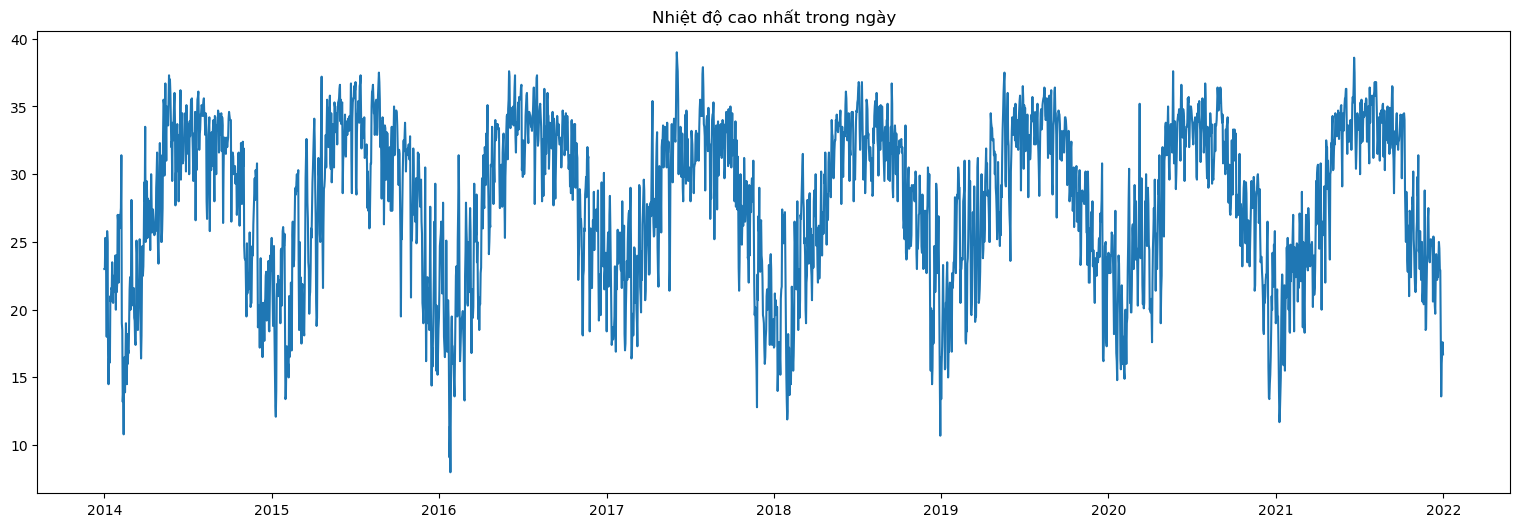

In [9]:
plt.figure(figsize=(19,6))
plt.plot(dataset.index, dataset['Tx'])
plt.title('Nhiệt độ cao nhất trong ngày');

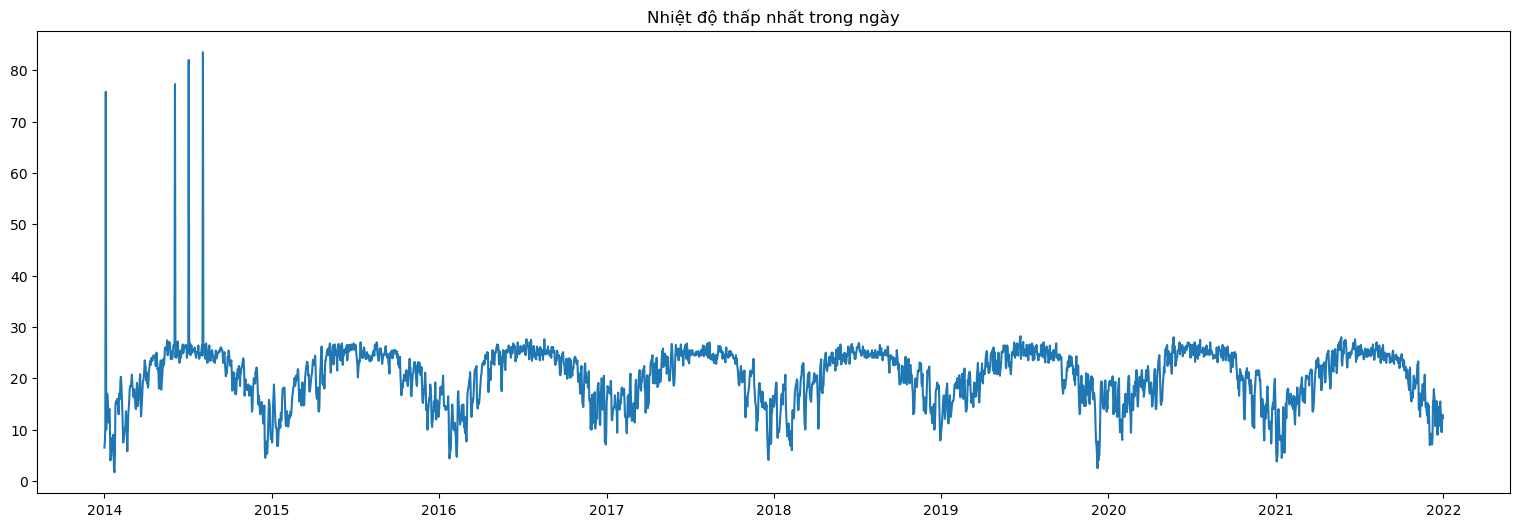

In [10]:
plt.figure(figsize=(19,6))
plt.plot(dataset.index, dataset['Tn'])
plt.title('Nhiệt độ thấp nhất trong ngày');

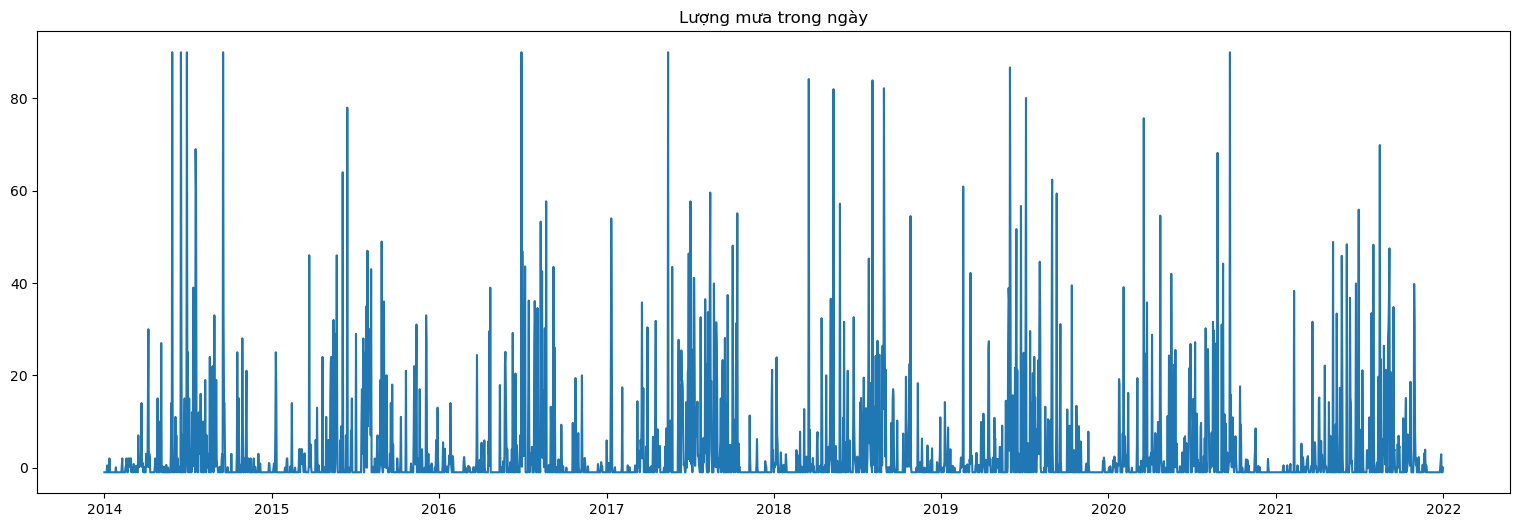

In [11]:
plt.figure(figsize=(19,6))
plt.plot(dataset.index, dataset['R'])
plt.title('Lượng mưa trong ngày');

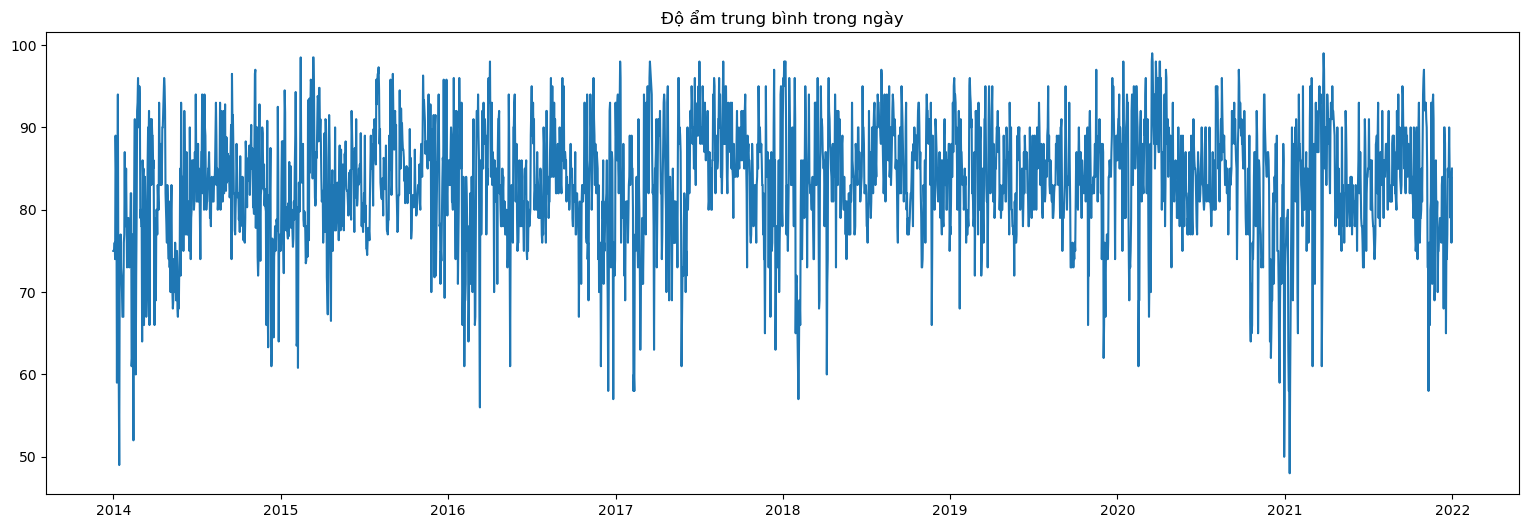

In [12]:
plt.figure(figsize=(19,6))
plt.plot(dataset.index, dataset['Utb'])
plt.title('Độ ẩm trung bình trong ngày');

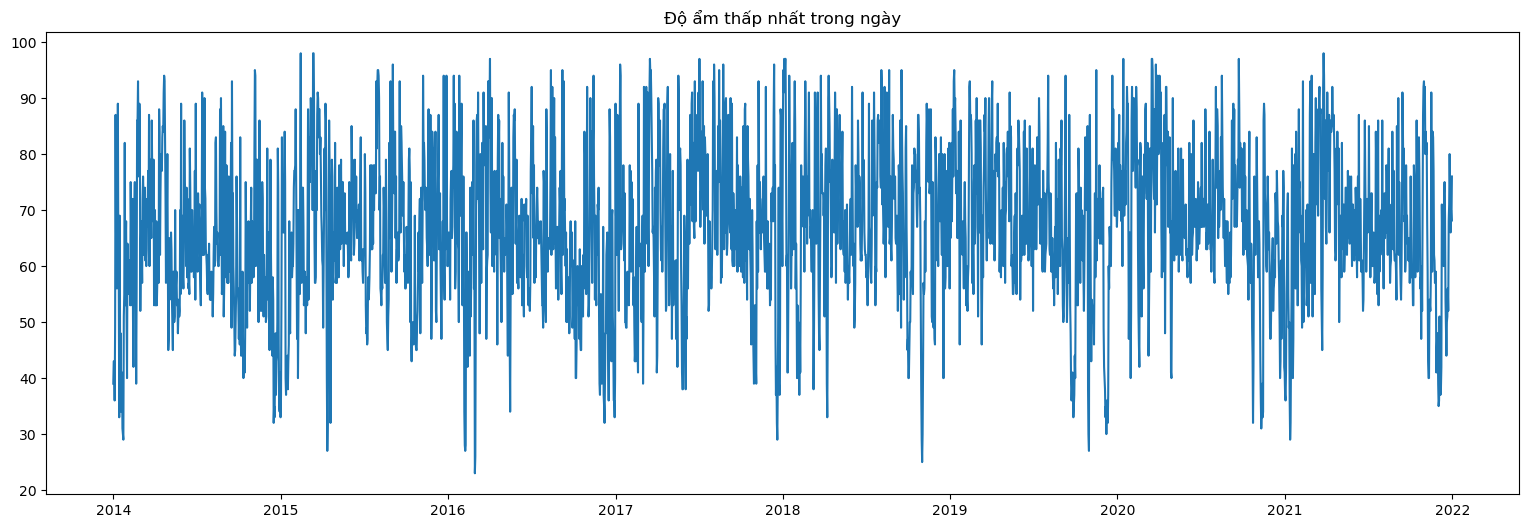

In [13]:
plt.figure(figsize=(19,6))
plt.plot(dataset.index, dataset['Un'])
plt.title('Độ ẩm thấp nhất trong ngày');

In [14]:
dataset.describe()

,Ttb,Tx,Tn,R,Utb,Un
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,23.284155,27.967796,20.433949,3.624709,83.347194,66.742300
std,5.157147,5.748642,5.583964,11.197734,7.131506,13.703928
min,6.100000,8.000000,1.700000,-1.000000,48.000000,23.000000
25%,19.400000,23.700000,16.900000,-1.000000,79.000000,58.000000
50%,24.500000,29.000000,21.600000,-1.000000,84.000000,66.000000
75%,27.600000,32.900000,24.600000,1.900000,88.000000,76.000000
max,31.600000,39.000000,83.500000,90.000000,99.000000,98.000000


`Góc nhìn rõ hơn về lượng mưa`

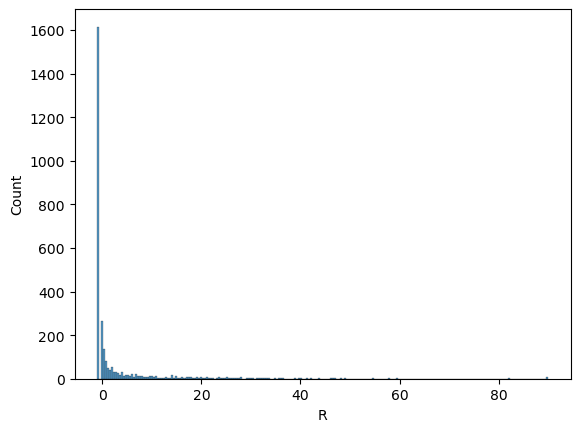

In [15]:
sns.histplot(data=dataset['R']);

`Nhìn vào cột 'R' ở bảng mô tả kết hợp với biểu đồ:`
* `Hơn 50% số ngày trong tập dữ liệu là không có mưa`
* `Luợng mưa thay đổi thất thường (ngày hôm qua không có mưa nhưng ngày hôm này có thể mưa rất nhiều)`
* `Theo tri thức từ thực tế thì để dự đoán chính xác lượng mưa thì sẽ cần có nhiều dữ kiện hơn (như mây, gió, ..)`

=> `Thay đổi giá trị của cột mưa thành 0(không có mưa) và 1(có mưa) nhằm đưa ra dự đoán chính xác hơn và tránh gây nhiễu đến         việc dự đoán các cột khác`

In [16]:
for i in range(len(dataset)):
    if  dataset['R'][i] == -1:
        dataset['R'][i] = 0
    else:
        dataset['R'][i] = 1

In [17]:
dataset.head()

,Ttb,Tx,Tn,R,Utb,Un
date,,,,,,
2014-01-01,12.8,23.0,6.5,0.0,75.0,39.0
2014-01-02,14.0,23.0,7.6,0.0,75.0,43.0
2014-01-03,16.7,25.3,10.6,0.0,75.0,43.0
2014-01-04,16.2,24.4,75.8,0.0,76.0,36.0
2014-01-05,15.6,22.6,10.0,0.0,74.0,49.0


## Unnoise

In [18]:
from scipy.signal import medfilt

In [19]:
unnoise_dataset = dataset.copy(deep=True)
unnoise_dataset['Ttb'] = medfilt(dataset['Ttb'], 3)
unnoise_dataset['Tx'] = medfilt(dataset['Tx'], 3)
unnoise_dataset['Tn'] = medfilt(dataset['Tn'], 3)
unnoise_dataset['Utb'] = medfilt(dataset['Utb'], 3)
unnoise_dataset['Un'] = medfilt(dataset['Un'], 3)

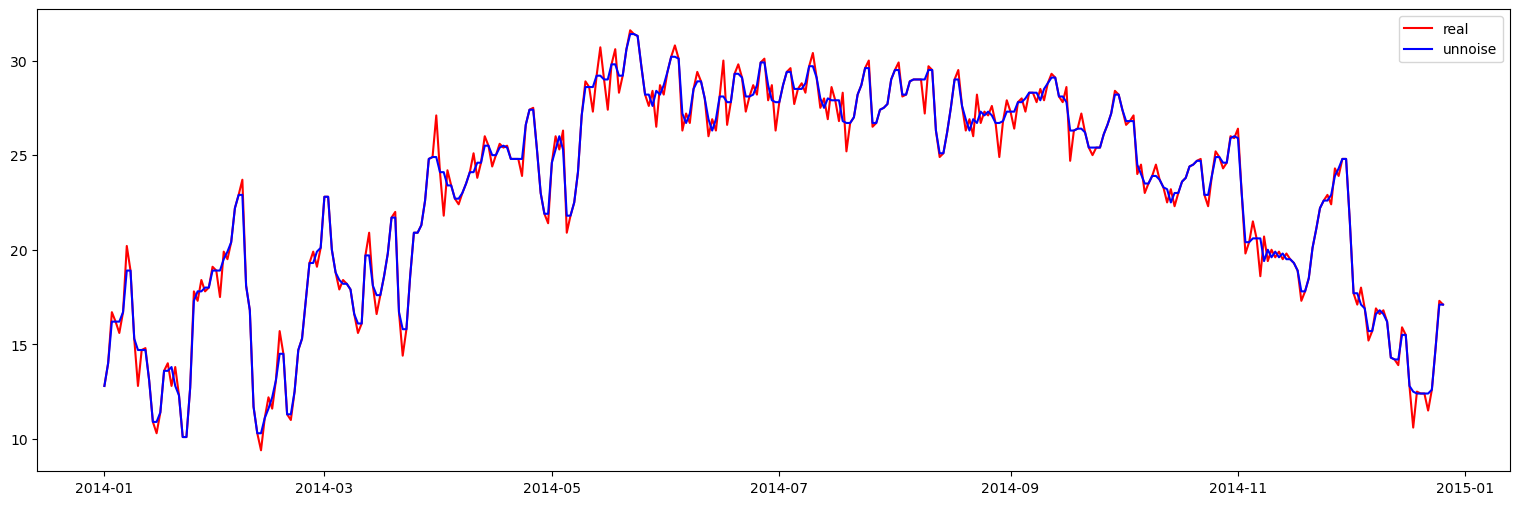

In [20]:
plt.figure(figsize=(19, 6))
plt.plot(dataset['Ttb'][:360], c='red', label='real')
plt.plot(unnoise_dataset['Ttb'][:360], c='blue', label='unnoise')
plt.legend();

## Save dataset as csv

In [21]:
dataset.to_csv(r'processed_data\dataset.csv')
unnoise_dataset.to_csv(r'processed_data\unnoise_dataset.csv')